In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [66]:
plt.rcParams['font.sans-serif'] = 'mingliu'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.titlesize'] = 25

In [67]:
df1111 = pd.read_excel('1111data.xlsx')
df1111

,職位名稱,工作網址,公司名稱,公司類別,工作地點,薪資,工作經驗,學歷,工作內容
0,python工程師,https://www.1111.com.tw/job/97374762/,億力資訊股份有限公司,電腦軟體相關,台北市松山區,面議（經常性薪資4萬/月含以上）,經驗不拘,專科以上,1.熟悉Git或其他版控工具 (must)\n2. 具備2年以上Python程式開發、維護經...
1,Python 工程師,https://www.1111.com.tw/job/85213563/,台灣宸運雲端有限公司,其他網路╱軟體相關,台中市西屯區,月薪 3.5萬~6.5萬元,1年工作經驗以上,學歷不拘,工作內容：\n- Python 監控與維運系統開發。\n\n職務要求： \n- Python...
2,Python工程師,https://www.1111.com.tw/job/97413223/,威寶數位科技股份有限公司,綜合商品批發代理,基隆市信義區,月薪 3.5萬~7萬元,1年工作經驗以上,學歷不拘,1. AI演算法之研究、發展、設計、構建、驗證等工作。\n2. 對需求模型進行特徵建構、演算...
3,Python程式設計師,https://www.1111.com.tw/job/97434536/,宅急網股份有限公司,電信相關,桃園市桃園區,面議（經常性薪資4萬/月含以上）,經驗不拘,"大學,碩士",我們公司秉持著「共同創業平台」，\n若有能力則歡迎接受挑戰，\n也歡迎社會新鮮人加入，\n讓...
4,Python 軟體工程師,https://www.1111.com.tw/job/91301892/,奇力速工業股份有限公司,電力機械器材製造修配,新北市新莊區,面議（經常性薪資4萬/月含以上）,3年工作經驗以上,專科以上,1. 熟悉Python程式語言\n2. 熟悉QT Designer 和Pyside2 \n3...
...,...,...,...,...,...,...,...,...,...
943,實習生-數據分析師,https://www.1111.com.tw/job/92200067/,中國人壽保險股份有限公司(總公司),人身保險,台北市松山區,時薪 170~190元,經驗不拘,"大學,碩士",1.資料清洗與整理\n2.大數據資料探索\n3.自動化作業開發\n4.機器學習模型建置\n5...
944,總公司市場行銷部核心系統專案人員,https://www.1111.com.tw/job/92139328/,三商美邦人壽保險股份有限公司(總公司),人身保險,台北市信義區,月薪 3.3萬~5萬元,經驗不拘,"大學,碩士",1.運用內外部數據，進行統計分析及建立AI模型\n2.資料採礦及整理\n\n《過試用期薪資會...
945,實習生-系統分析師,https://www.1111.com.tw/job/92200064/,中國人壽保險股份有限公司(總公司),人身保險,台北市松山區,時薪 170~190元,經驗不拘,"大學,碩士",1.Java及python程式開發維護\n2.自動化機器人流程及腳本錄製管理(關燈工廠最佳案...
946,V數據分析師,https://www.1111.com.tw/job/92200481/,中國人壽保險股份有限公司(總公司),人身保險,台北市松山區,面議（經常性薪資4萬/月含以上）,3年工作經驗以上,"大學,碩士",1.客戶行銷名單之效益分析並提出整體成效優化見解。\n2.重點專案分析與客群分析並提出策略見...


In [68]:
df104 = pd.read_excel('104data.xlsx')
df104

,職位名稱,工作網址,公司名稱,公司類別,工作地點,薪資,工作經驗,學歷,工作內容
0,System Engineer 系統工程師,//www.104.com.tw/job/6hsh8?jobsource=hotjob_chr,\n希格斯資訊科技有限公司\n,NaN,新北市新店區,待遇面議,經歷不拘,大學,負責公司各項系統之規劃與建置、管理及維護。\n\n工作內容 ： \n1. 解決方案研究與導入...
1,SRE(服務可靠性工程師),//www.104.com.tw/job/63z79?jobsource=hotjob_chr,\n希格斯資訊科技有限公司\n,NaN,新北市新店區,待遇面議,經歷不拘,大學,在Higgs，服務可靠性工程師 (Service Reliability Engineer)...
2,Linux應用系統工程師,//www.104.com.tw/job/70ruf?jobsource=hotjob_chr,\n紅石資訊有限公司\n,NaN,台北市內湖區,"月薪50,000元以上",經歷不拘,專科,1、負責業務應用系統的審核、部署、發佈、監控、維護和優化。\n2、負責突發事件管理，問題跟蹤...
3,Backend Engineer,//www.104.com.tw/job/6i6ms?jobsource=hotjob_chr,\n美商格拉思緹有限公司台灣分公司\n,NaN,台北市南港區,"月薪80,000~110,000元",經歷不拘,大學,Glasnostic is developing a groundbreaking clou...
4,Firmware QA Engineer,//www.104.com.tw/job/78ynp?jobsource=hotjob_chr,\n(SynapticsTaiwan)香港商新思國際科技有限公司台灣分公司\n,NaN,台北市內湖區,待遇面議,1年以上,大學,- Participate automation test development on r...
...,...,...,...,...,...,...,...,...,...
2778,資深全端工程師,//www.104.com.tw/job/6v1jt?jobsource=jolist_c_...,\n尋味股份有限公司\n,網際網路相關業,台北市中山區,待遇面議,5年以上,大學,1.\t與 UX/UI Designer 合作，參與 App 設計過程。\r\n2.\tiO...
2779,Automation Engineer/自動化測試軟體開發工程師,//www.104.com.tw/job/6zfmv?jobsource=jolist_c_...,\n鋐寶科技股份有限公司\n,消費性電子產品製造業,新竹縣竹北市,待遇面議,經歷不拘,大學,1. 負責撰寫自動化測試案例與執行自動化測試 \r\n2. 設計與研發自動化測試工具 \r\...
2780,系統開發後端工程師,//www.104.com.tw/job/75a17?jobsource=jolist_c_...,\n緯育股份有限公司\n,電腦系統整合服務業,新北市汐止區,"月薪40,000~70,000元",1年以上,大學,化\n4.Survey開發技術與分享\n5.以敏捷式開發為主，配合團隊不斷調整出最佳的開發模...
2781,DevOps Engineer | 系統工程師,//www.104.com.tw/job/66fyz?jobsource=jolist_c_...,\nNexioTechnologyLimited_睿世軟體科技股份有限公司\n,電腦軟體服務業,台北市內湖區,待遇面議,經歷不拘,大學,- Understand the requirements of project imple...


In [69]:
df = pd.concat([df1111,df104])
df

,職位名稱,工作網址,公司名稱,公司類別,工作地點,薪資,工作經驗,學歷,工作內容
0,python工程師,https://www.1111.com.tw/job/97374762/,億力資訊股份有限公司,電腦軟體相關,台北市松山區,面議（經常性薪資4萬/月含以上）,經驗不拘,專科以上,1.熟悉Git或其他版控工具 (must)\n2. 具備2年以上Python程式開發、維護經...
1,Python 工程師,https://www.1111.com.tw/job/85213563/,台灣宸運雲端有限公司,其他網路╱軟體相關,台中市西屯區,月薪 3.5萬~6.5萬元,1年工作經驗以上,學歷不拘,工作內容：\n- Python 監控與維運系統開發。\n\n職務要求： \n- Python...
2,Python工程師,https://www.1111.com.tw/job/97413223/,威寶數位科技股份有限公司,綜合商品批發代理,基隆市信義區,月薪 3.5萬~7萬元,1年工作經驗以上,學歷不拘,1. AI演算法之研究、發展、設計、構建、驗證等工作。\n2. 對需求模型進行特徵建構、演算...
3,Python程式設計師,https://www.1111.com.tw/job/97434536/,宅急網股份有限公司,電信相關,桃園市桃園區,面議（經常性薪資4萬/月含以上）,經驗不拘,"大學,碩士",我們公司秉持著「共同創業平台」，\n若有能力則歡迎接受挑戰，\n也歡迎社會新鮮人加入，\n讓...
4,Python 軟體工程師,https://www.1111.com.tw/job/91301892/,奇力速工業股份有限公司,電力機械器材製造修配,新北市新莊區,面議（經常性薪資4萬/月含以上）,3年工作經驗以上,專科以上,1. 熟悉Python程式語言\n2. 熟悉QT Designer 和Pyside2 \n3...
...,...,...,...,...,...,...,...,...,...
2778,資深全端工程師,//www.104.com.tw/job/6v1jt?jobsource=jolist_c_...,\n尋味股份有限公司\n,網際網路相關業,台北市中山區,待遇面議,5年以上,大學,1.\t與 UX/UI Designer 合作，參與 App 設計過程。\r\n2.\tiO...
2779,Automation Engineer/自動化測試軟體開發工程師,//www.104.com.tw/job/6zfmv?jobsource=jolist_c_...,\n鋐寶科技股份有限公司\n,消費性電子產品製造業,新竹縣竹北市,待遇面議,經歷不拘,大學,1. 負責撰寫自動化測試案例與執行自動化測試 \r\n2. 設計與研發自動化測試工具 \r\...
2780,系統開發後端工程師,//www.104.com.tw/job/75a17?jobsource=jolist_c_...,\n緯育股份有限公司\n,電腦系統整合服務業,新北市汐止區,"月薪40,000~70,000元",1年以上,大學,化\n4.Survey開發技術與分享\n5.以敏捷式開發為主，配合團隊不斷調整出最佳的開發模...
2781,DevOps Engineer | 系統工程師,//www.104.com.tw/job/66fyz?jobsource=jolist_c_...,\nNexioTechnologyLimited_睿世軟體科技股份有限公司\n,電腦軟體服務業,台北市內湖區,待遇面議,經歷不拘,大學,- Understand the requirements of project imple...


In [70]:
city = ['台北', '新北', '桃園', '新竹', '台中', '台南', '高雄']
citycount = []
for i in city:
    df1 = df[df['工作地點'].str.contains(i)]
    citycount.append(len(df1))
    
ser = pd.Series(citycount, index=city)
ser

台北    1766
新北     517
桃園     246
新竹     543
台中     335
台南      92
高雄     117
dtype: int64

<AxesSubplot:title={'center':'python職缺比例'}, ylabel='None'>

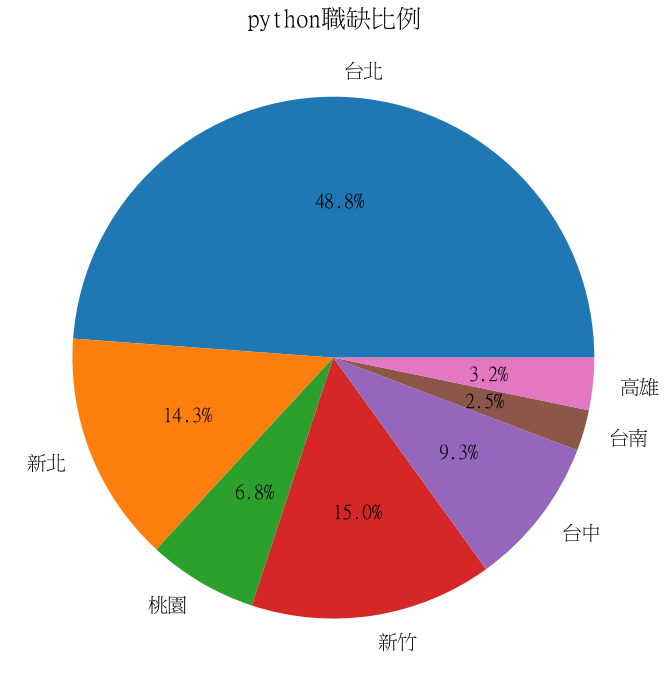

In [71]:
plt.axis('off')
ser.plot(kind='pie', title='python職缺比例', autopct='%1.1f%%', figsize=(12,12), fontsize=20)

In [72]:
companyType = df.groupby('公司類別').size().nlargest(15)
companyType

公司類別
電腦軟體服務業         546
網際網路相關業         270
電腦系統整合服務業       211
半導體製造業          194
電腦及其週邊設備製造業     178
其它軟體及網路相關業      145
電腦╱週邊設備製造       141
半導體製造           117
IC設計相關業         112
人力仲介╱代徵╱職業介紹     94
電腦軟體相關           88
消費性電子產品製造業       79
人力仲介代徵           72
其他電子零組件相關業       70
人力派遣╱人力供應        56
dtype: int64

<AxesSubplot:title={'center':'職缺產業分布'}, ylabel='公司類別'>

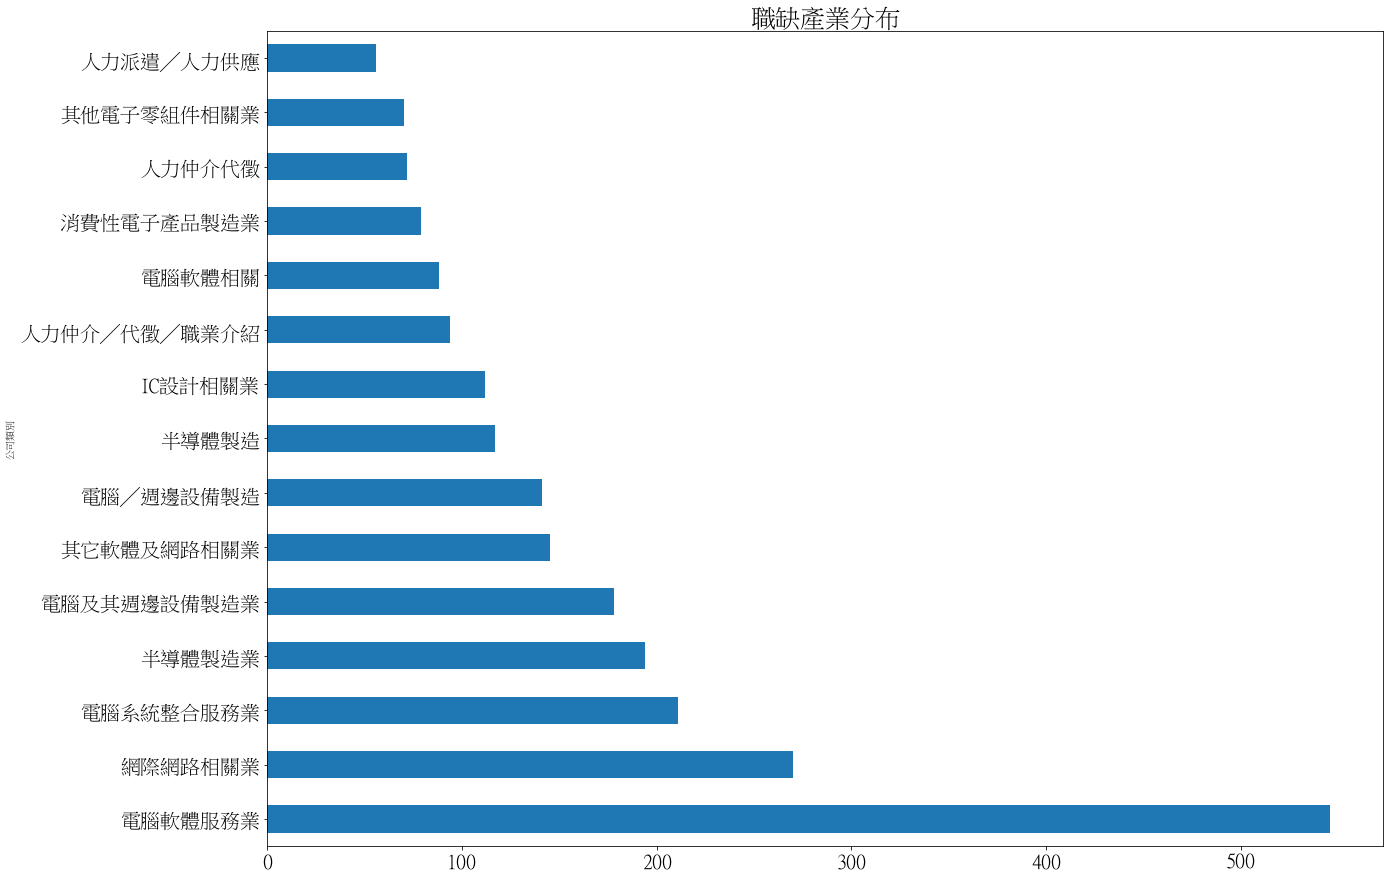

In [73]:
companyType.plot(kind='barh', title="職缺產業分布", figsize=(20,15), fontsize=20)

In [74]:
school = df.groupby('學歷').size()
school

學歷
博士             25
國小/國中,高中職       1
大學           1657
大學,博士           2
大學,碩士         227
大學以上          293
學歷不拘          152
專科            560
專科,大學           8
專科,大學,碩士       33
專科以上           69
碩士            538
碩士,博士          92
高中             55
高中以下            3
高中職以上          16
dtype: int64

<AxesSubplot:title={'center':'職缺學歷分布'}, ylabel='學歷'>

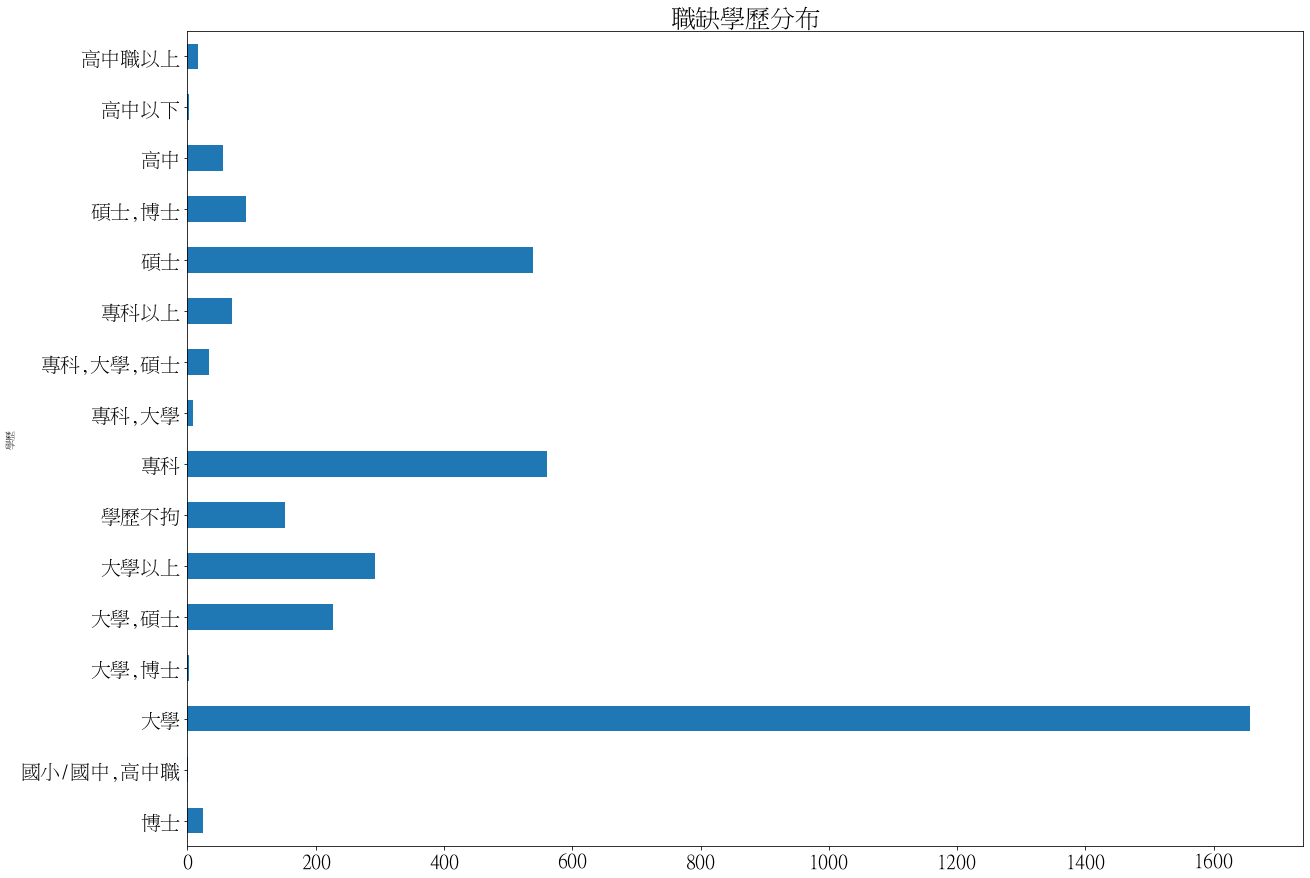

In [75]:
school.plot(kind='barh', title="職缺學歷分布", figsize=(20,15), fontsize=20)

In [76]:
minList = []
meanList = []
medianList = []
maxList = []

for i in city:
    citySalaryList = []
    
    df1 = df[(df['工作地點'].str.contains(i))]
    df1 = df1[ (df1['薪資'].str.contains('年薪')) | (df1['薪資'].str.contains('月薪')) ]
    
    for salary in df1['薪資'].values:
        salary = salary.replace(',', '')
        salaryList = re.findall(r"\d+\.?\d*萬?", salary)
        
        if len(salaryList) > 0:
            # 將萬取代掉, 並X10000
            salaryList = [ float(i.replace('萬',''))*10000 if i.find('萬')!=-1 else int(i) for i in salaryList]
            
            if '年薪' in salary:
                salaryList = [ i/12 for i in salaryList]
                citySalaryList.extend(salaryList)
                
            if '月薪' in salary:
                if not re.search(r'\d{7}', salary):
                    citySalaryList.extend(salaryList)
                    
#             if i == '台中':
#                 print(salary, salaryList)
   
    citySalaryNp = np.array(citySalaryList)
    citySalaryNp = np.sort(citySalaryNp)
    
    print(i, ':')
    print('最小 ', np.min(citySalaryNp).astype(int))
    print('平均數 ', np.mean(citySalaryNp).astype(int))
    print('中位數', np.median(citySalaryNp).astype(int))
    print('最大 ', np.max(citySalaryNp).astype(int))
    print('-'*90)
    
    minList.append(np.min(citySalaryNp).astype(int))
    meanList.append(np.mean(citySalaryNp).astype(int))
    medianList.append(np.median(citySalaryNp).astype(int))
    maxList.append(np.max(citySalaryNp).astype(int))

台北 :
最小  24000
平均數  62069
中位數 50000
最大  416666
------------------------------------------------------------------------------------------
新北 :
最小  24000
平均數  52396
中位數 50000
最大  132000
------------------------------------------------------------------------------------------
桃園 :
最小  25000
平均數  44719
中位數 38000
最大  100000
------------------------------------------------------------------------------------------
新竹 :
最小  24000
平均數  48468
中位數 45000
最大  250000
------------------------------------------------------------------------------------------
台中 :
最小  24000
平均數  50805
中位數 45000
最大  208333
------------------------------------------------------------------------------------------
台南 :
最小  24000
平均數  43476
中位數 40000
最大  100000
------------------------------------------------------------------------------------------
高雄 :
最小  26000
平均數  47583
中位數 45000
最大  120000
------------------------------------------------------------------------------------------


In [77]:
salaryDf = pd.DataFrame({
    '最低月薪':minList,
    '平均數月薪':meanList,
    '中位數月薪':medianList,
    '最高月薪':maxList,
}, index=city)

salaryDf

,最低月薪,平均數月薪,中位數月薪,最高月薪
台北,24000,62069,50000,416666
新北,24000,52396,50000,132000
桃園,25000,44719,38000,100000
新竹,24000,48468,45000,250000
台中,24000,50805,45000,208333
台南,24000,43476,40000,100000
高雄,26000,47583,45000,120000


<AxesSubplot:>

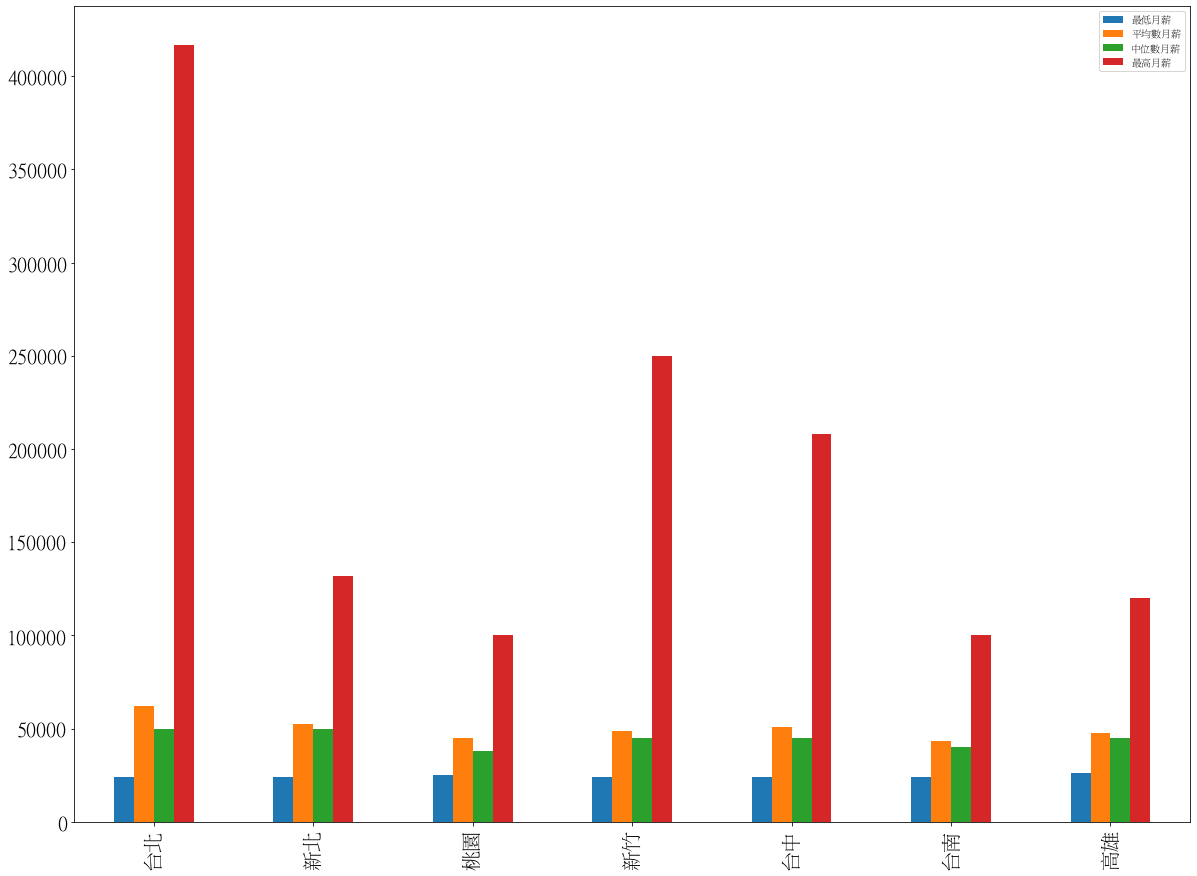

In [78]:
salaryDf.plot(kind='bar', figsize=(20,15), fontsize=20)